<a href="https://colab.research.google.com/github/priyeshroy10155/Deep-learning-projects/blob/main/binary_class_classification_Horse_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# from google.colab import files #code for import kaggle data
# !pip install -q kaggle

In [3]:
#  uploaded = files.upload()

In [4]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# #chancge mode
# !chmod 600 ~/.kaggle/kaggle.json

In [5]:
#  !kaggle datasets download -d sanikamal/horses-or-humans-dataset

In [6]:
# !unzip /content/horses-or-humans-dataset.zip -d /content/horses-or-humans

In [7]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [8]:
train_path = "/content/horses-or-humans/horse-or-human/train"
validation_path = "/content/horses-or-humans/horse-or-human/validation"

In [9]:
training_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, 
                                       height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [10]:
training_data = training_data_gen.flow_from_directory(train_path, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 1027 images belonging to 2 classes.


In [11]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [12]:
valid_data_gen = ImageDataGenerator(rescale=1./255)

In [13]:
validate_data = training_data_gen.flow_from_directory(validation_path, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 256 images belonging to 2 classes.


In [14]:
def plotImage(image_array):
  fig, axes = plt.subplots(1,5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(image_array, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()  

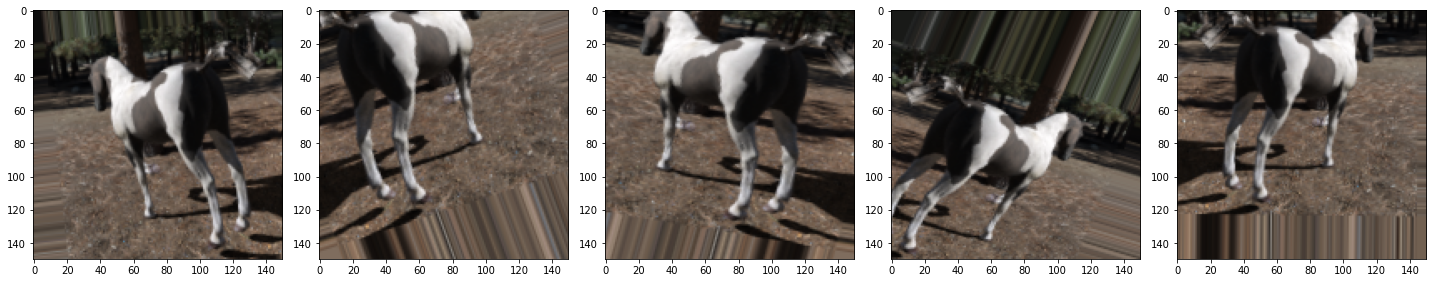

In [15]:
images = [training_data[0][0][0] for i in range(10)]
plotImage(images)

In [16]:
from keras.backend import dropout
## Building CNN Model
conv_model = keras.models.Sequential([
                                      keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                      keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      keras.layers.Conv2D(filters=64, kernel_size=3),
                                      keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      keras.layers.Conv2D(filters=128, kernel_size=3),
                                      keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      keras.layers.Conv2D(filters=256, kernel_size=3),
                                      keras.layers.Dropout(0.5),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(units=128, activation='relu'),
                                      keras.layers.Dropout(0.1),
                                      keras.layers.Dense(units=256, activation='relu'),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units=2, activation='softmax')
])

In [17]:
conv_model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
from tensorflow.python.training.tracking.util import Checkpoint
## find accurate epoche value and save its
model_path = "/content/drive/MyDrive/Colab Notebooks/horse-or-human/horse_human_predictor.h5"
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [19]:
history = conv_model.fit(training_data,
                         epochs=200,
                         verbose=1,
                         validation_data = validate_data,
                         callbacks = callbacks_list)

Epoch 1/200
33/33 [==============================] - ETA: 0s - loss: 0.6508 - accuracy: 0.6232
Epoch 1: val_accuracy improved from -inf to 0.58203, saving model to /content/drive/MyDrive/Colab Notebooks/horse-or-human/horse_human_predictor.h5
33/33 [==============================] - 17s 412ms/step - loss: 0.6508 - accuracy: 0.6232 - val_loss: 0.7116 - val_accuracy: 0.5820
Epoch 2/200
33/33 [==============================] - ETA: 0s - loss: 0.5264 - accuracy: 0.7556
Epoch 2: val_accuracy did not improve from 0.58203
33/33 [==============================] - 13s 407ms/step - loss: 0.5264 - accuracy: 0.7556 - val_loss: 1.3708 - val_accuracy: 0.5117
Epoch 3/200
33/33 [==============================] - ETA: 0s - loss: 0.4598 - accuracy: 0.8023
Epoch 3: val_accuracy did not improve from 0.58203
33/33 [==============================] - 13s 397ms/step - loss: 0.4598 - accuracy: 0.8023 - val_loss: 1.4116 - val_accuracy: 0.5430
Epoch 4/200
33/33 [==============================] - ETA: 0s - loss: 

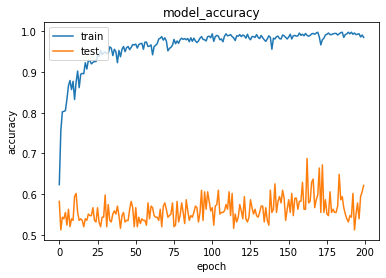

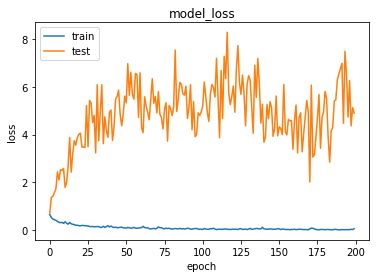

In [20]:
## Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Summarize History for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
model_path01 = "/content/drive/MyDrive/Colab Notebooks/horse-or-human/horse_human_predictor.h5"

In [23]:
model1 = keras.models.load_model(model_path01)

In [24]:
import numpy as np
import tensorflow as tf
import keras.utils as image
from tensorflow.keras.utils import img_to_array

In [25]:
def pred_human_horse(model, horse_or_human):
  test_image = tf.keras.utils.load_img(horse_or_human, target_size=(150, 150))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis= 0)
  result = model.predict(test_image).round(3)

  pred = np.argmax(result)
  print(result, "====>", pred)

  if pred == 0:
    print("Predicted ==> Horse")
  else:
    print("predicted ==> Human")  

In [26]:
## Horse Image Path
hr1 ='/content/horses-or-humans/horse-or-human/horse-or-human/validation/horses/horse1-000.png'
hr5='/content/horses-or-humans/horse-or-human/horse-or-human/validation/horses/horse1-105.png'
hr2 = '/content/horses-or-humans/horse-or-human/horse-or-human/validation/horses/horse1-105.png'


In [27]:
## Human Image Path
hum1='/content/horses-or-humans/horse-or-human/horse-or-human/validation/humans/valhuman01-01.png'
hum2 = '/content/horses-or-humans/horse-or-human/train/humans/human01-01.png'
hum5 = '/content/horses-or-humans/horse-or-human/train/humans/human01-05.png'

In [28]:
for horse_or_human in [hr5,hr2,hr1, hum1,hum2,hum5]:
  pred_human_horse(model1, horse_or_human)

1/1 [==============================] - 0s 206ms/step
[[0.523 0.477]] ====> 0
Predicted ==> Horse
1/1 [==============================] - 0s 16ms/step
[[0.523 0.477]] ====> 0
Predicted ==> Horse
1/1 [==============================] - 0s 15ms/step
[[0.032 0.968]] ====> 1
predicted ==> Human
1/1 [==============================] - 0s 17ms/step
[[0. 1.]] ====> 1
predicted ==> Human
1/1 [==============================] - 0s 22ms/step
[[0. 1.]] ====> 1
predicted ==> Human
1/1 [==============================] - 0s 18ms/step
[[0. 1.]] ====> 1
predicted ==> Human
